<a href="https://colab.research.google.com/github/jimmyQuigeeAnalytics/Unsupervised-Learning/blob/main/Economic_and_Health_Segmentation_Using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Economic and Health Segmentation of Countries Using K-Means Clustering

#### Introduction
In this case study, we explore the economic and health data of 167 countries to identify patterns and categorize these countries into distinct clusters. The objective is to use K-means clustering to understand and visualize the socio-economic and health status across nations, which can aid in targeted policy making and resource allocation.

#### Objectives
- To segment countries based on various economic indicators like GDP, income, and health spending.
- To identify countries with similar economic and health challenges and opportunities.

#### K-Means Algorithm

This is a centroid-based clustering algorithm that tries to minimize the distance of the points within a cluster with their centroid. To know more about the K-Means clustering, its applications, and its implementation in python, please refer to this article. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

#### Methodology

To conduct a comprehensive K-means clustering analysis using the provided dataset, we'll follow these key steps:

1. **Data Loading and Exploration**: Load the data to understand its structure and content.
2. **Data Preprocessing**: Clean and prepare the data for analysis, including handling missing values and normalizing data if necessary.
3. **Choosing the Number of Clusters**: Use methods like the Elbow Method to determine an appropriate number of clusters for K-means clustering.
4. **Clustering**: Apply the K-means algorithm to segment the data into clusters.
5. **Analysis of Clusters**: Analyze and interpret the characteristics of each cluster.
6. **Conclusions and Recommendations**: Draw conclusions from the clustering results and provide actionable recommendations based on the findings.

#### Data Collection
The dataset includes the following indicators for each country:
- **Child Mortality**: Deaths of children under 5 years per 1000 live births.
- **Exports, Imports**: Percentage of GDP.
- **Health**: Total health spending as a percentage of GDP.
- **Income**: Gross national income per capita.
- **Inflation**: Annual percentage growth rate of GDP.
- **Life Expectancy**: Average number of years a new born is expected to live under current mortality patterns.
- **Total Fertility Rate**: The number of children that would be born to each woman.
- **GDP per Capita**: Gross domestic product per capita.

### Step 1: Data Loading and Exploration
This initial step involves loading the dataset to understand its structure, features, and preliminary characteristics.

**Code Explanation:**

- **`import pandas as pd`**: Imports the pandas library, which is essential for data manipulation and analysis.
- **`pd.read_csv(file_path)`**: Loads the CSV file from the specified path into a DataFrame.
- **`data.head()`**: Shows the first five rows of the DataFrame to get a quick glimpse of the data and its format.
- **`data.info()`**: Provides a concise summary of the DataFrame, including the number of non-null entries and data types of each column.
- **`data.describe()`**: Generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN values.

In [62]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Load the dataset
data = pd.read_csv('Country-data.csv')

In [64]:
# Display the first few rows of the dataset and its summary statistics
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [65]:
data.shape

(167, 10)

The dataset contains data on 167 countries with 10 different features.

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


All columns are complete with no missing values. The dataset seems well-prepared for further analysis. Given the features like income, exports, imports, and GDP, these are likely economic indicators that can help us segment the countries into different clusters based on their economic status and health metrics.

In [67]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Step 2: Data Preprocessing
Before applying K-means clustering, data needs to be prepared. This includes scaling the data to normalize its range.

**Code Explanation:**

- **`StandardScaler()`**: Scales features to have zero mean and unit variance, crucial for the performance of many machine learning algorithms.
- **`data.drop('country', axis=1)`**: Removes the 'country' column since K-means requires numerical input.
- **`scaler.fit_transform(data_numerical)`**: Computes the mean and standard deviation used for later scaling and scales the features.
- **`pd.DataFrame(data_scaled, columns=data_numerical.columns)`**: Converts the scaled array back to a DataFrame, preserving column names.

In [68]:
from sklearn.preprocessing import StandardScaler

# Dropping the 'country' column and retaining it for future use
country_names = data['country']
data_numerical = data.drop('country', axis=1)

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Converting the scaled data back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data_numerical.columns)

**Code Explanation:**

- **`StandardScaler()`**: Scales features to have zero mean and unit variance, crucial for the performance of many machine learning algorithms.
- **`data.drop('country', axis=1)`**: Removes the 'country' column since K-means requires numerical input.
- **`scaler.fit_transform(data_numerical)`**: Computes the mean and standard deviation used for later scaling and scales the features.
- **`pd.DataFrame(data_scaled, columns=data_numerical.columns)`**: Converts the scaled array back to a DataFrame, preserving column names.

### Step 3: Choosing the Number of Clusters
Determining the right number of clusters is key to effective clustering.

To determine the appropriate number of clusters for our K-means analysis, we'll use the Elbow Method. This involves plotting the sum of squared distances of samples to their closest cluster center for a range of cluster numbers. We typically look for a 'knee' in the plot, where the rate of decrease sharply shifts. This point suggests a good balance between the number of clusters and the compactness of the clustering, which can be seen as an optimal point for choosing the number of clusters.

**Code Explanation:**

- **`KMeans(n_clusters=k, random_state=42)`**: Initializes the K-means algorithm with `k` clusters.
- **`kmeans.inertia_`**: Measures the sum of squared distances of samples to their closest cluster center.
- **`plt.plot(cluster_range, sse, marker='o')`**: Plots the elbow graph to help identify the best value of `k`.

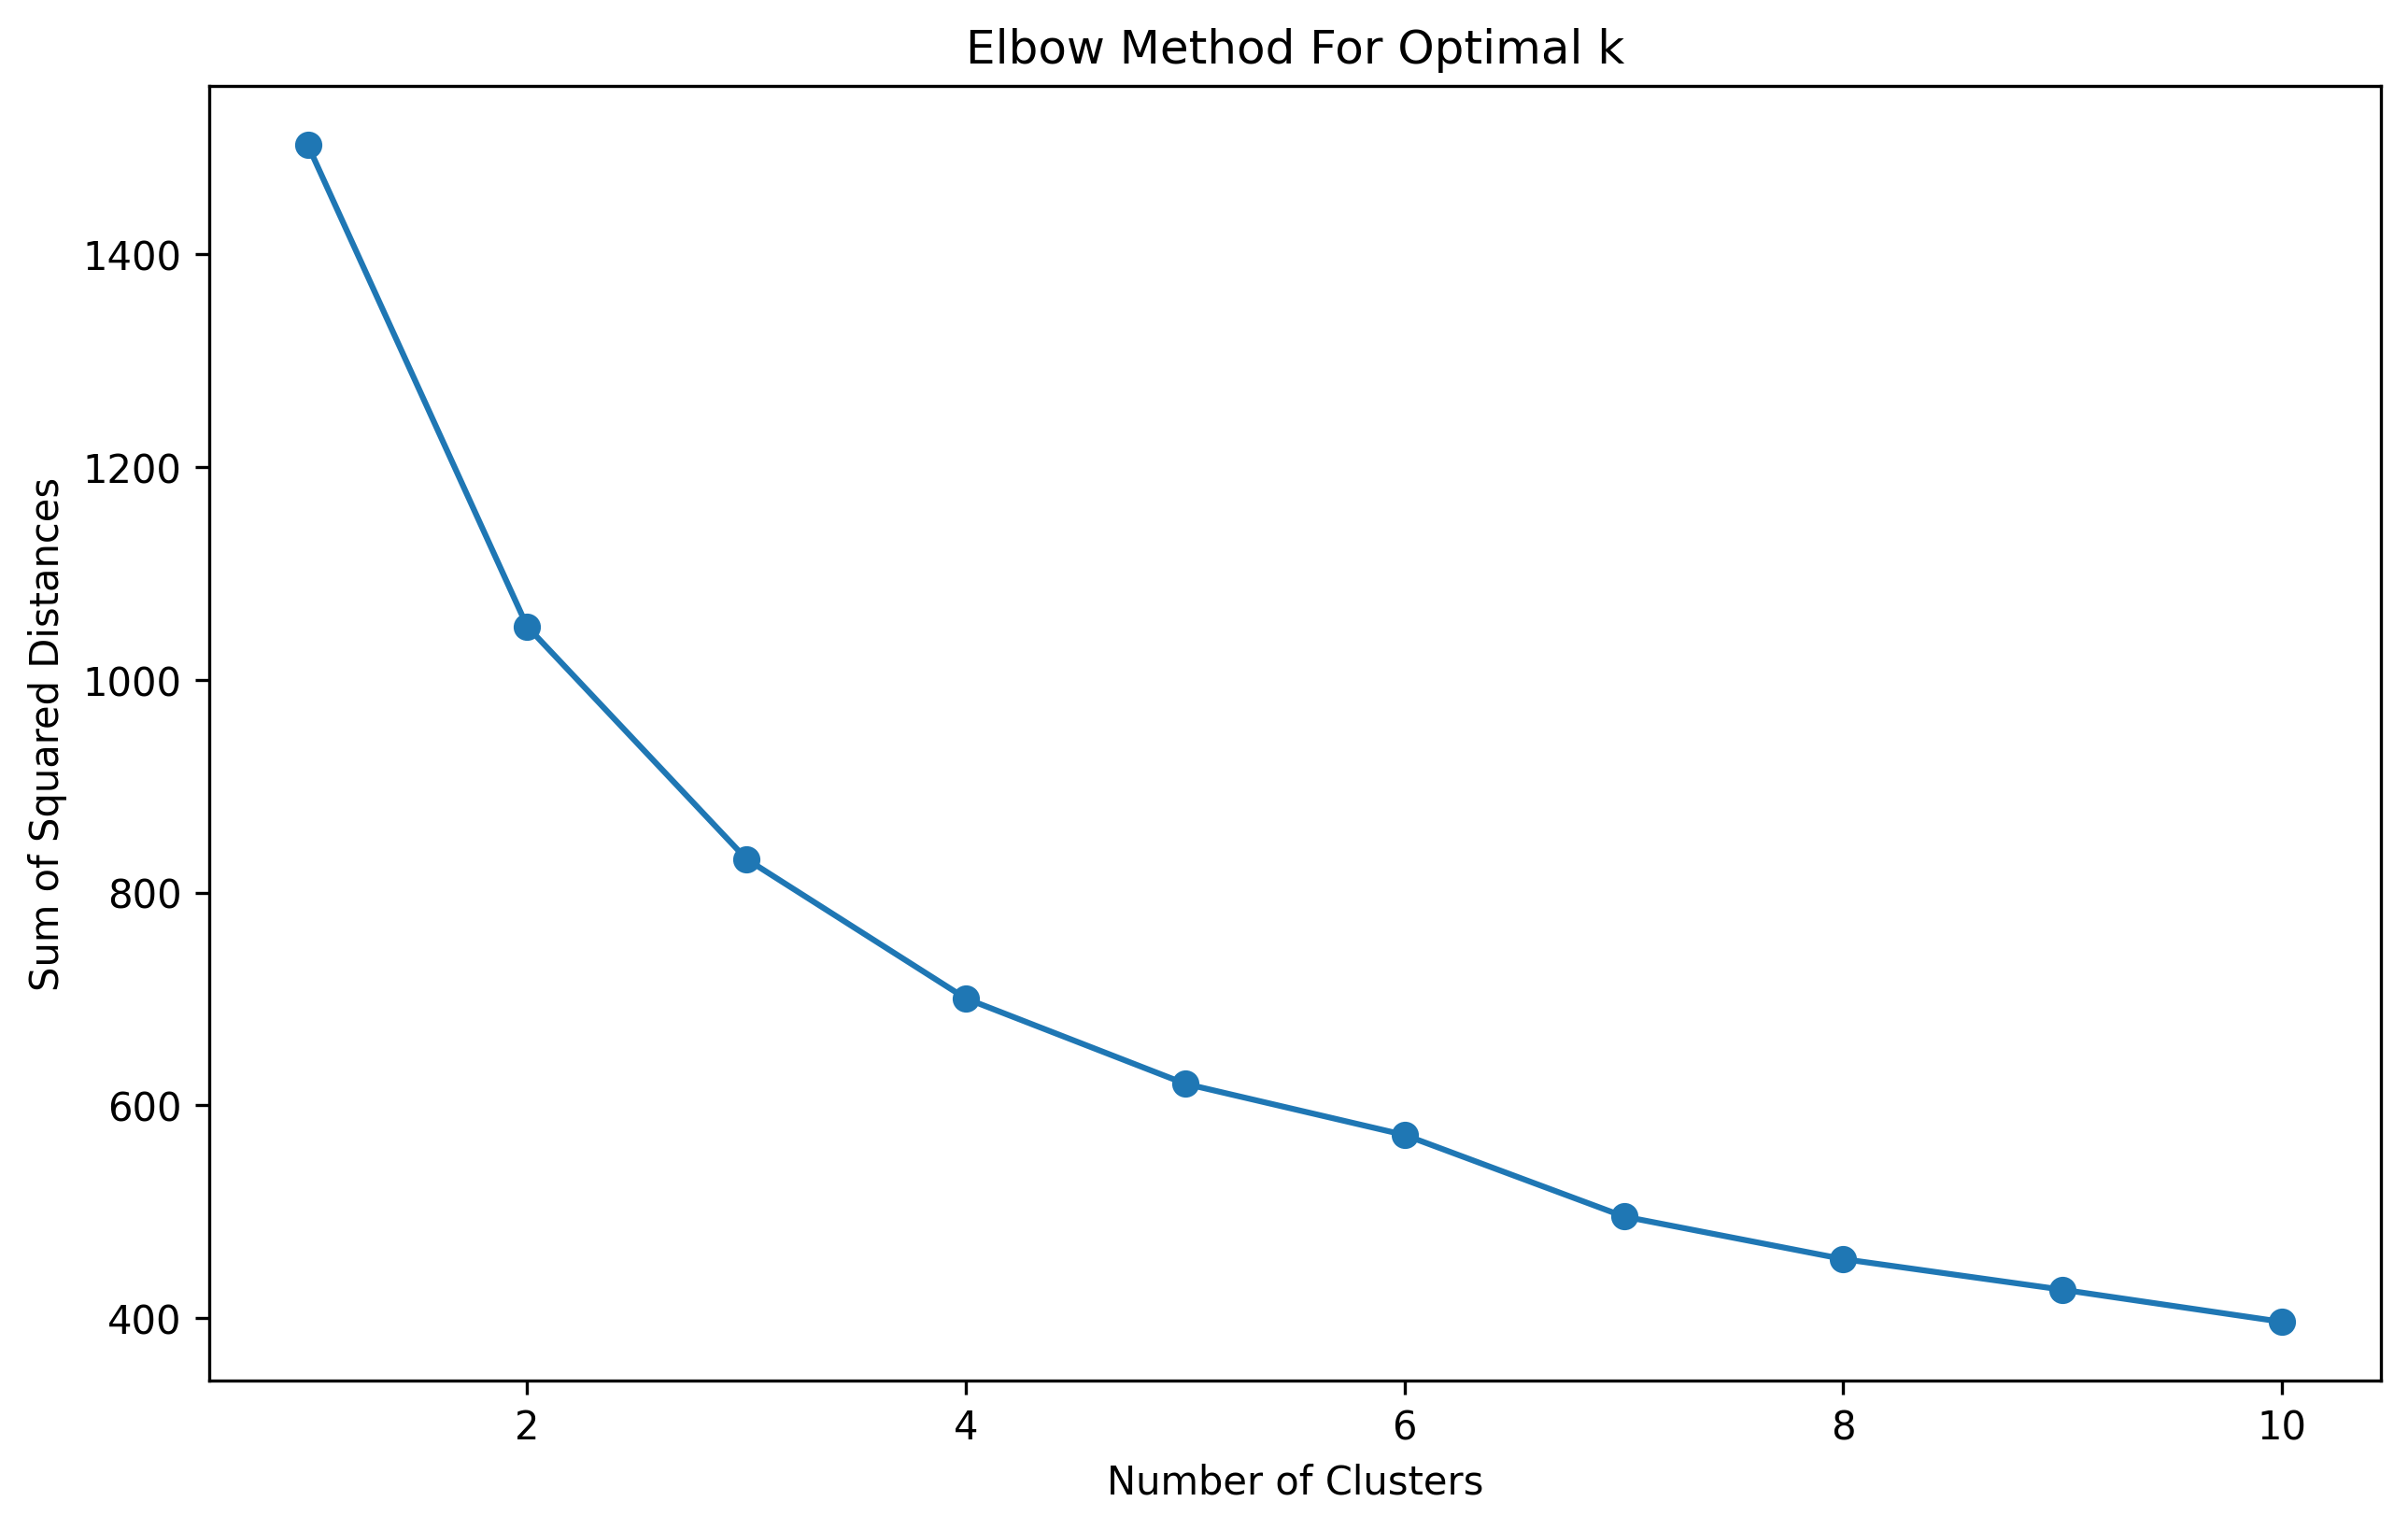

In [69]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculating the sum of squared distances for different numbers of clusters
sse = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(False)
plt.show()

The plot shows a bend around **k = 3**, which suggests that dividing the countries into three clusters might be a good choice for this dataset. This point is where the decrease in the sum of squared distances starts to diminish, indicating diminishing returns on increasing the number of clusters.

### Step 4: Clustering with K-means
Once the optimal number of clusters is determined, the next step is to apply K-means to segment the data.

Now that we've determined an optimal number of clusters (k=3), let's proceed to apply the K-means clustering algorithm with this number of clusters and analyze the results.

Let's perform the clustering and examine how countries are grouped.

**Code Explanation:**

- **`kmeans_optimal.fit_predict(data_scaled_df)`**: Applies the K-means clustering with 3 clusters to the scaled data and assigns cluster labels.
- **`data_with_clusters['Cluster'] = clusters`**: Adds a new column to the original DataFrame to store the cluster labels for each country.

In [70]:
# Clustering with optimal number of clusters
kmeans_optimal = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_optimal.fit_predict(data_scaled_df)

# Adding the cluster labels to the original dataset for better interpretation
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters

# Displaying the first few rows of the dataset with cluster labels
data_with_clusters.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


The data now includes a 'Cluster' label for each country, grouping them into three clusters. Let’s analyze these clusters to understand the characteristics that differentiate them. We'll look at the average values of the features for each cluster, which can give insights into what defines each group.

Let's compute the mean of each feature within each cluster to see how they differ.

### Step 5: Analysis of Clusters
This final step involves analyzing the clusters to understand their characteristics based on the clustering result.

**Code Explanation:**

- **`data_with_clusters.drop('country', axis=1)`**: Temporarily drops the 'country' column, which is non-numeric, before grouping the data by cluster.
- **`groupby('Cluster').mean()`**: After excluding the 'country' column, this calculates the mean for the remaining numeric columns within each cluster.

In [71]:
# Ensure that only numeric columns are included when calculating mean values for each cluster
cluster_means = data_with_clusters.drop('country', axis=1).groupby('Cluster').mean()

# Displaying the mean values by cluster
cluster_means

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


The clusters can be characterized based on the mean values of their economic and health indicators:

- **Cluster 0** (High Income, High GDP):
  - **Child Mortality**: Very low
  - **Income**: Very high (average \$45,672)
  - **Life Expectancy**: Very high (average 80.1 years)
  - **GDP per Capita**: Very high (average \$42,494)
  - This cluster represents wealthy countries with strong health systems and economies.

- **Cluster 1** (Low Income, Low GDP):
  - **Child Mortality**: Very high
  - **Income**: Low (average \$3,942)
  - **Life Expectancy**: Low (average 59.2 years)
  - **GDP per Capita**: Low (average \$1,922)
  - This cluster includes poorer countries with significant challenges in health and economic development.

- **Cluster 2** (Moderate Income, Moderate GDP):
  - **Child Mortality**: Moderate
  - **Income**: Moderate (average \$12,306)
  - **Life Expectancy**: Good (average 72.8 years)
  - **GDP per Capita**: Moderate (average \$6,486)
  - This cluster represents countries in a transitional stage, with moderate economic performance and health outcomes.

#### Visualize the Clusters

To visualize the clusters formed by the K-means algorithm on your country data, you can use a scatter plot. However, since the dataset is multidimensional, we need to reduce the dimensions to 2D or 3D for visualization purposes. One common approach is to use Principal Component Analysis (PCA) to reduce the dimensions while preserving as much information as possible.

#### Step 1: Apply Principal Component Analysis (PCA)
Before visualizing the high-dimensional data, it’s useful to reduce its dimensionality while preserving as much variance as possible. PCA is used here to reduce the data to two principal components suitable for a 2D scatter plot.

**Explanation:**
- **`PCA(n_components=2)`**: Initializes a PCA transformer to reduce the dataset to two dimensions.
- **`fit_transform(data_scaled_df)`**: Fits the PCA model to the scaled data and then transforms it, resulting in a new dataset with just two principal components per observation.

In [72]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled_df)

#### Step 2: Create a DataFrame with PCA Results and Cluster Labels
Once we have the principal components, we combine them with the cluster labels into a new DataFrame. This DataFrame will be used for visualizing each point with its corresponding cluster.

**Explanation:**
- **`pd.DataFrame(data=principal_components, ...)`**: Constructs a DataFrame from the PCA-transformed data, naming the columns as 'Principal Component 1' and 'Principal Component 2'.
- **`pca_df['Cluster'] = clusters`**: Appends the cluster labels to the DataFrame, aligning each data point with its assigned cluster.

In [73]:
# Creating a DataFrame with the PCA results and the cluster labels
pca_df = pd.DataFrame(data=principal_components,
                      columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = clusters

#### Step 3: Visualize the Clusters Using a Scatter Plot
The final step is to visually plot the clusters. Each cluster will have a distinct color, and we use matplotlib to create a scatter plot of the two principal components.

**Explanation:**
- **`plt.figure(figsize=(10, 8))`**: Sets up the figure size for the plot.
- **`for cluster in pca_df['Cluster'].unique():`**: Iterates over each unique cluster.
- **`plt.scatter(...)`**: Creates a scatter plot for each cluster with a specified color and label.
- **`plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`**: Adds a title and labels to the axes.
- **`plt.legend()`**: Displays a legend to help identify each cluster by color.
- **`plt.show()`**: Displays the plot.

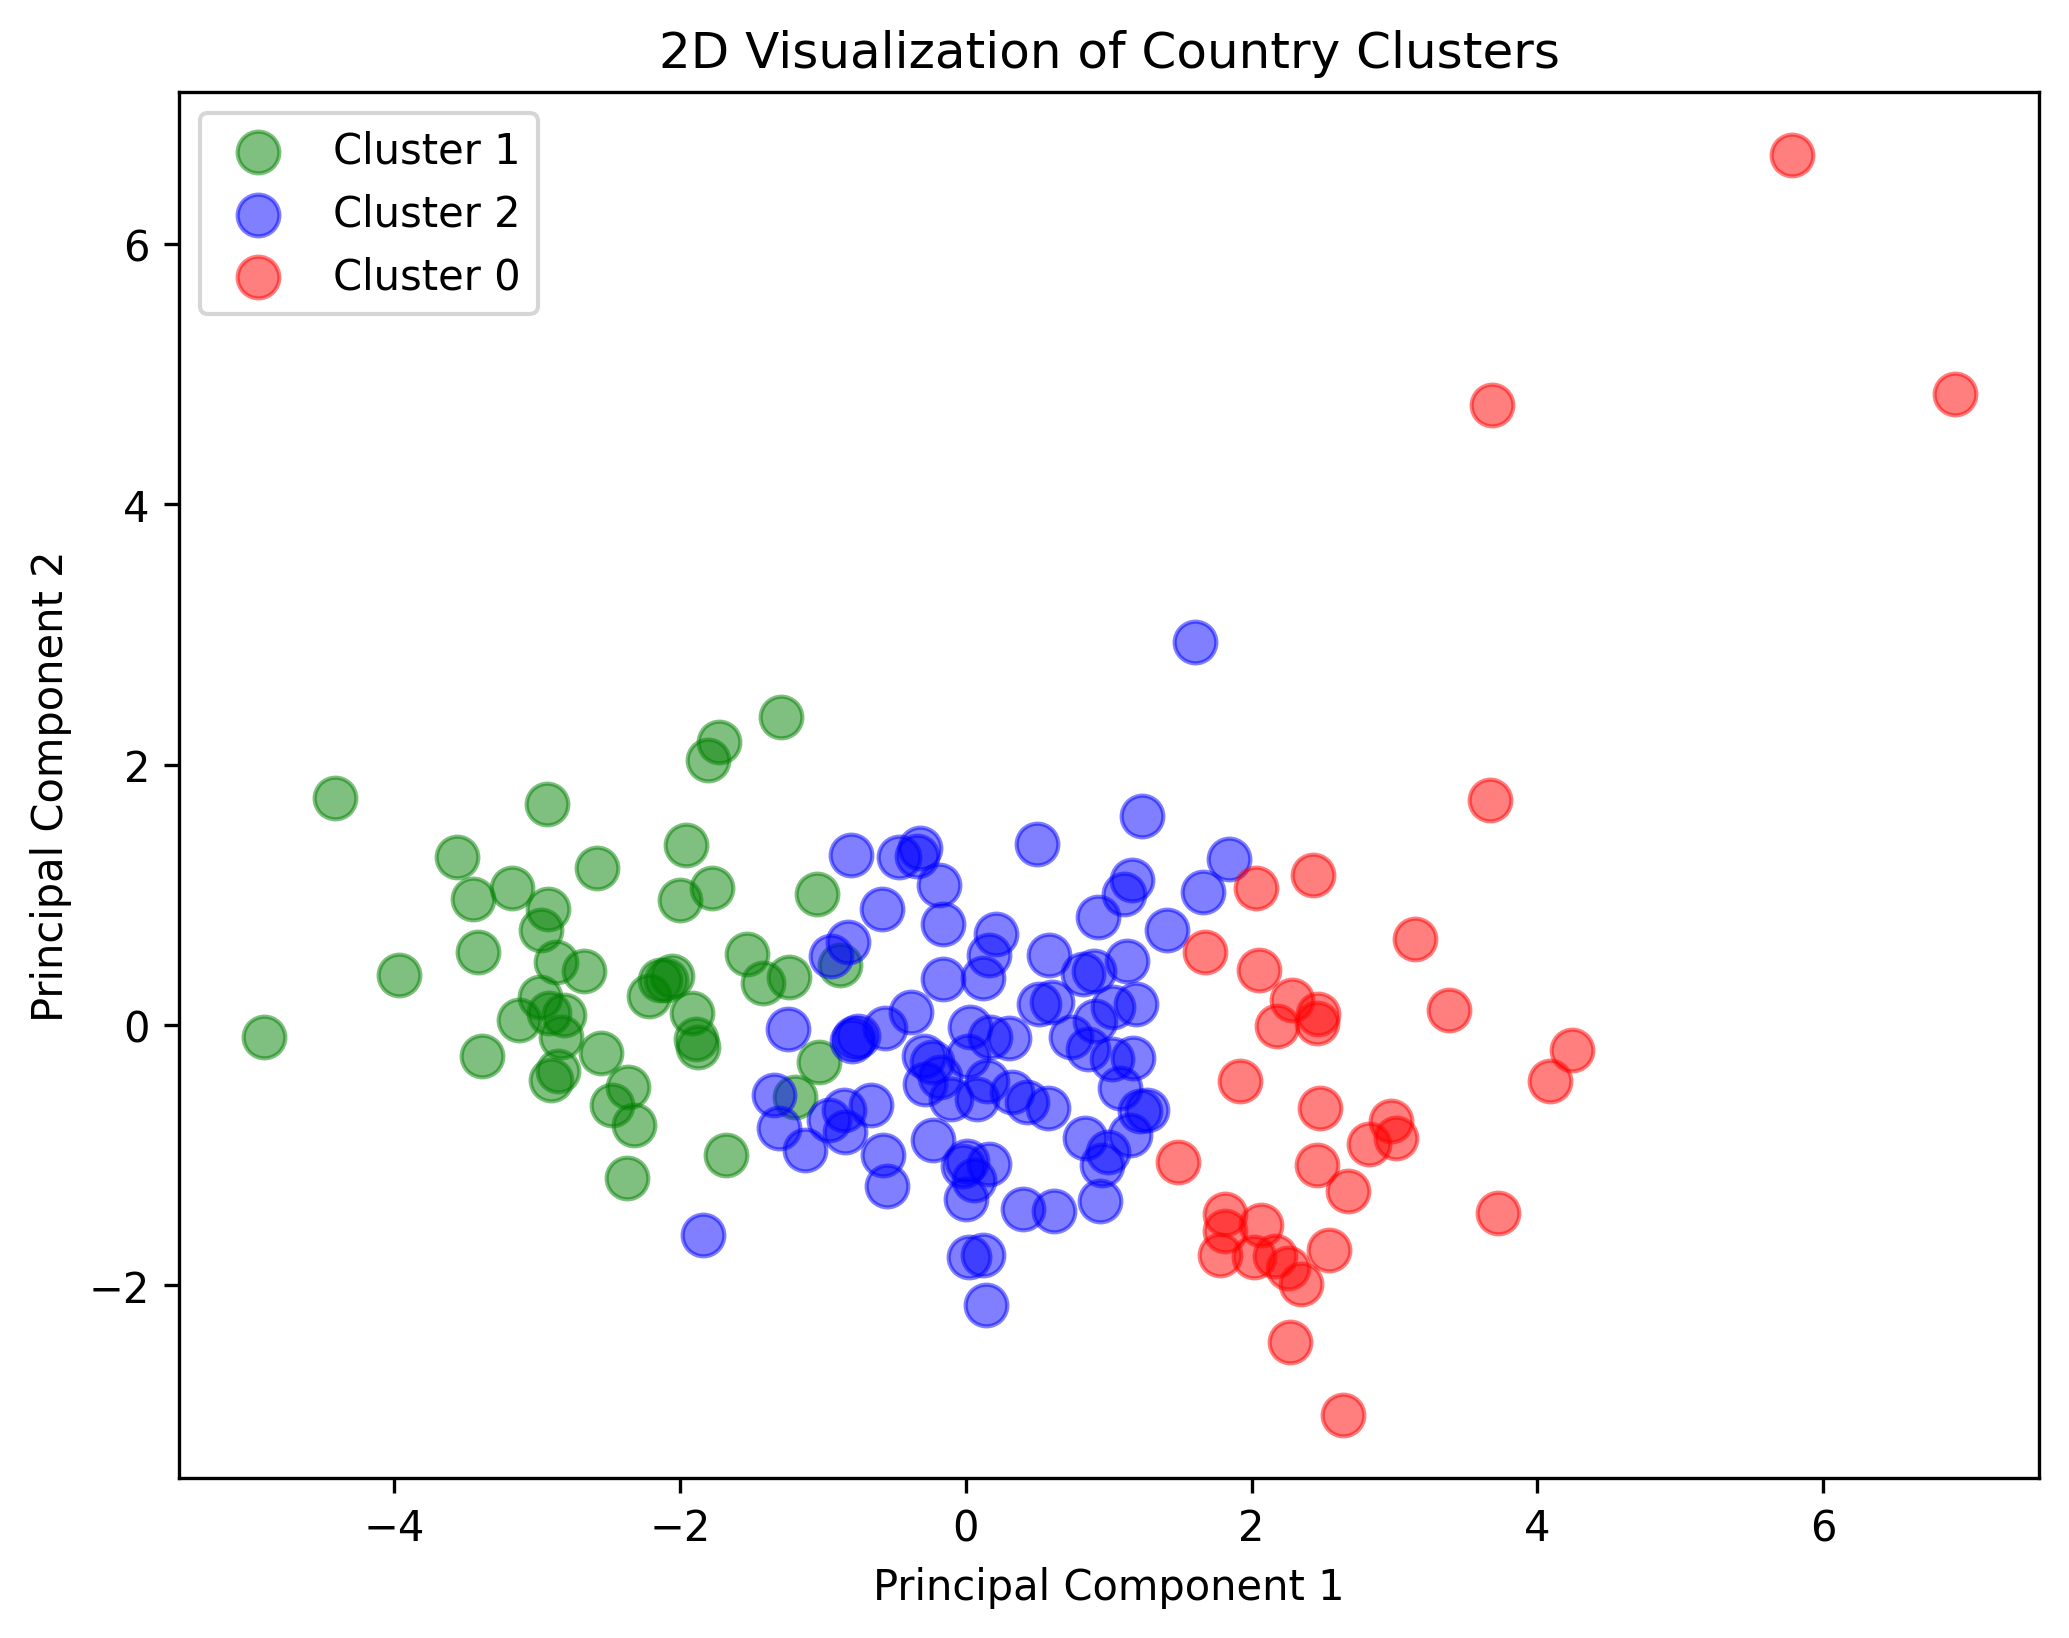

In [74]:
import matplotlib.pyplot as plt

# Plotting the clusters using the first two principal components
plt.figure(figsize=(8, 6), dpi=300)
colors = ['r', 'g', 'b']
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], s=100,
                c=colors[cluster], label=f'Cluster {cluster}', alpha=0.5)

plt.title('2D Visualization of Country Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)
plt.show()

### Conclusions and Recommendations

The clustering provides clear distinctions among groups of countries based on their economic status and health metrics, offering insights for tailored economic policies or aid programs:

- **Cluster 0**: Focus on maintaining economic stability and advancing technological innovations.
- **Cluster 1**: Targeted aid and development programs are necessary to improve health, education, and infrastructure.
- **Cluster 2**: Investments in education and economic diversification could help these countries transition to higher income brackets.

This analysis can help international organizations and governments to better allocate resources and design policies that are specific to the needs of different groups of countries. Further analysis could explore more granular segmentation or incorporate additional variables like political stability, educational attainment, or climate risks.

### Future Work
Further analysis could incorporate additional variables such as political stability, educational attainment, and environmental factors to refine the clusters and understand more nuanced distinctions among countries.

This structured approach gives a clear roadmap from data preparation through analysis to implications, providing actionable insights based on the clustering results.